In [13]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import math
import statistics
import h5py
import pickle
import random
from random import randrange

In [14]:
higgs_data = open("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(higgs_data)

higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [15]:
qcd_data = open("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(qcd_data)

qcd.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

## 1 Make a stacked histogram plot for the feature variable: mass

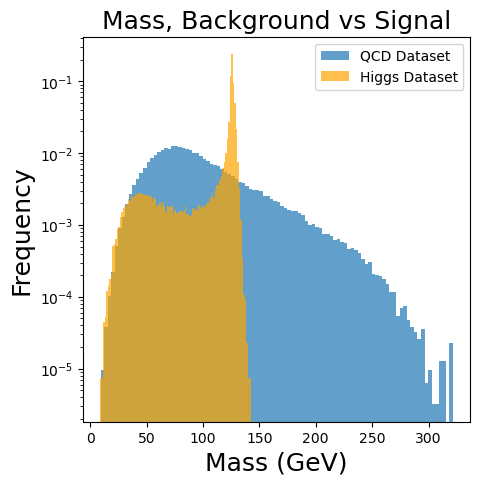

In [16]:
fig, ax = plt.subplots(nrows =1, ncols = 1, figsize = (5,5))


ax.hist(qcd['mass'], 100, alpha = 0.7, label = 'QCD Dataset', density = True)
ax.hist(higgs['mass'], 100, color = 'orange', alpha = 0.7, label = 'Higgs Dataset', density = True)
ax.legend()
ax.set_title('Mass, Background vs Signal', fontsize = 18)
ax.set_ylabel('Frequency', fontsize = 18)
ax.set_xlabel(('Mass (GeV)'), fontsize = 18)
ax.set_yscale('log')
plt.show()

### Use Poisson statistics for significance calculation

In [17]:
muq = 20000
val = 20100


prob5sig = 1/3.5e6
val5sig = stats.poisson.ppf(1-prob5sig, muq)
print('Value for 5 Sigma significance: ' + str(val5sig))

sigma20100 = -stats.norm.ppf(1-stats.poisson.cdf(val,muq))
print('Poisson significance of 100 Higgs: '+str(sigma20100))

print('Estimated significance of 100 Higgs: ' +str(100/(20000**(1/2))))

Value for 5 Sigma significance: 20711.0
Poisson significance of 100 Higgs: 0.7112259282313185
Estimated significance of 100 Higgs: 0.7071067811865475


### Compare the exact significance to the approximation NHiggs/(√NQCD). If they are equivalent, explain your findings.

#### Using normal distribution equation of Z = (X - mu)/Sigma
X - mu = N_higgs
Sigma is a root mean squared figure lending itself to sqrt(Nqcd), as such is the width of the peak.
Using NHiggs/(√NQCD), this produces a strong esitmate of our data.

### Make a stacked histogram plot

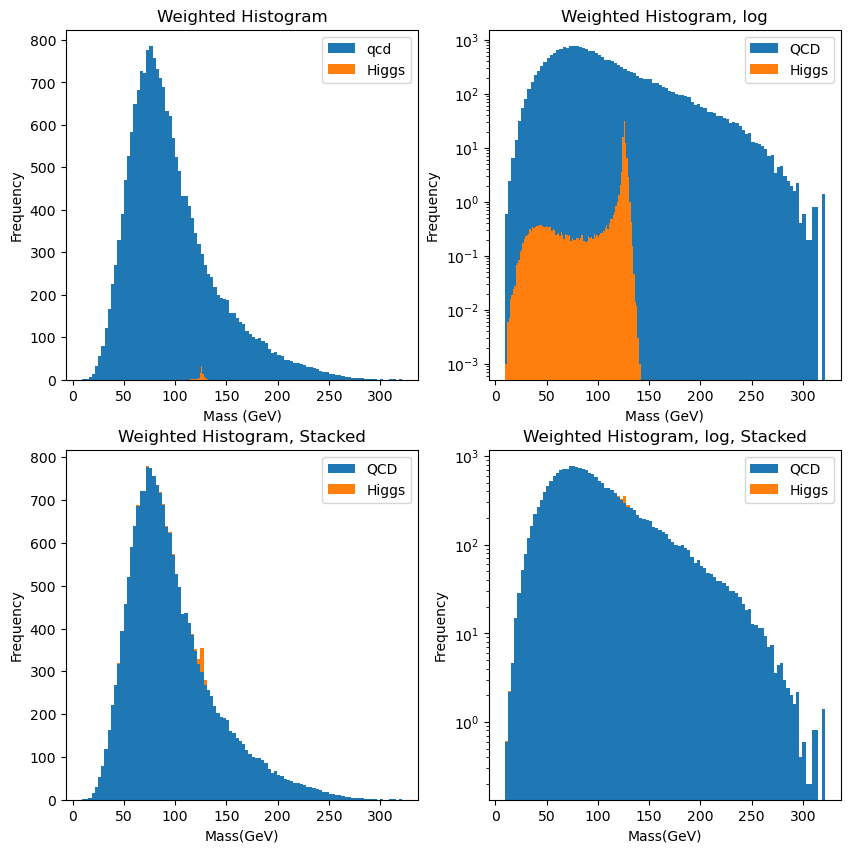

In [18]:
s1 = 20000/100000
s2 = 100/100000
i = np.zeros(100000)
ii = np.zeros(100000)
i[:] = s1
ii[:] = s2
hmass = higgs['mass']
qmass = qcd['mass']
fig, ax = plt.subplots(nrows =2, ncols = 2, figsize = (10,10))

ax[0,0].hist(qmass, weights = i, bins = 100, label = 'qcd')
ax[0,0].hist(hmass, weights = ii, bins = 100, label = 'Higgs')
ax[0,0].set_title('Weighted Histogram')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_xlabel('Mass (GeV)')
ax[0,0].legend()

ax[0,1].hist(qmass, weights = i, bins = 100, label = 'QCD')
ax[0,1].hist(hmass, weights = ii, bins = 100, label = 'Higgs')
ax[0,1].set_title('Weighted Histogram, log')
ax[0,1].set_ylabel('Frequency')
ax[0,1].set_xlabel('Mass (GeV)')
ax[0,1].set_yscale('log')
ax[0,1].legend()

ax[1,0].hist((qmass,hmass), weights = (i,ii), bins = 100, label = ('QCD','Higgs'), stacked = True)
ax[1,0].set_title('Weighted Histogram, Stacked')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_xlabel('Mass(GeV)')
ax[1,0].legend()

ax[1,1].hist((qmass,hmass), weights = (i,ii), bins = 100, label = ('QCD','Higgs'), stacked = True)
ax[1,1].set_title('Weighted Histogram, log, Stacked')
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_xlabel('Mass(GeV)')
ax[1,1].set_yscale('log')
ax[1,1].legend()
plt.show()

## Identify mass cuts to optimize the expected significance

### Try different mass cuts systematically
### Evaluate expected significance for each set of mass cuts
### Identify the set of mass cuts which give you the highest significance.


#### expected significance = Nhiggs / sqrt(Nqcd)

In [192]:
hmassnum = hmass[::200]
qmassnum = qmass
#print(np.size(hmassnum))
#print(np.size(qmassnum))
#Ratio of points is correct for Nhiggs and Nqcd


## loop evaluating each integer mass for highest significance
start =10
shift = start-1
lst = list(range(start,350,1))
x = 0
index = range(1, np.size(lst))
for xx in lst:
    hcut = hmassnum[hmassnum < xx]
    qcut = qmassnum[qmassnum < xx]
    hsize = np.size(hcut)
    qsize = np.size(qcut)
    sig = hsize/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location and significance is ' + str(v[max_value]))


start2 = 10
shift2 = start2-1
lst2 = list(range(start2,300,1))
x2 = 0
index = range(1, np.size(lst2))
for xx2 in lst2:
    hcut2 = hmassnum[hmassnum > xx2]
    qcut2 = qmassnum[qmassnum > xx2]
    hsize2 = np.size(hcut2)
    qsize2 = np.size(qcut2)
    sig2 = hsize2/(qsize2**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2

a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst2,y2))
print('(Cutting Left) location and significance is ' + str(v2[max_value2]))



hhcut3 = hmassnum[(hmassnum > v2[max_value2][0]) & (hmassnum < v[max_value][0])]
qcut3 = qmassnum[(qmassnum > v2[max_value2][0]) & (qmassnum < v[max_value][0])]
hsize3 = np.size(hcut3)
qsize3 = np.size(qcut3)
sig3 = hsize3/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))

(Cutting Right) location and significance is (135, 1.7423506660610701)
(Cutting Left) location and significance is (121, 2.545374059470958)
Significance between cuts 4.893384728977832


# 3 Make two sets of stacked histogram plots for the rest of the features

    Set A without any event selection
        Can you identify another feature as discriminative as mass? (i.e. equal or better significance after feature cut)
    Set B with your optimal mass cuts
        Can you identify another feature to further improve your expected signifiance?


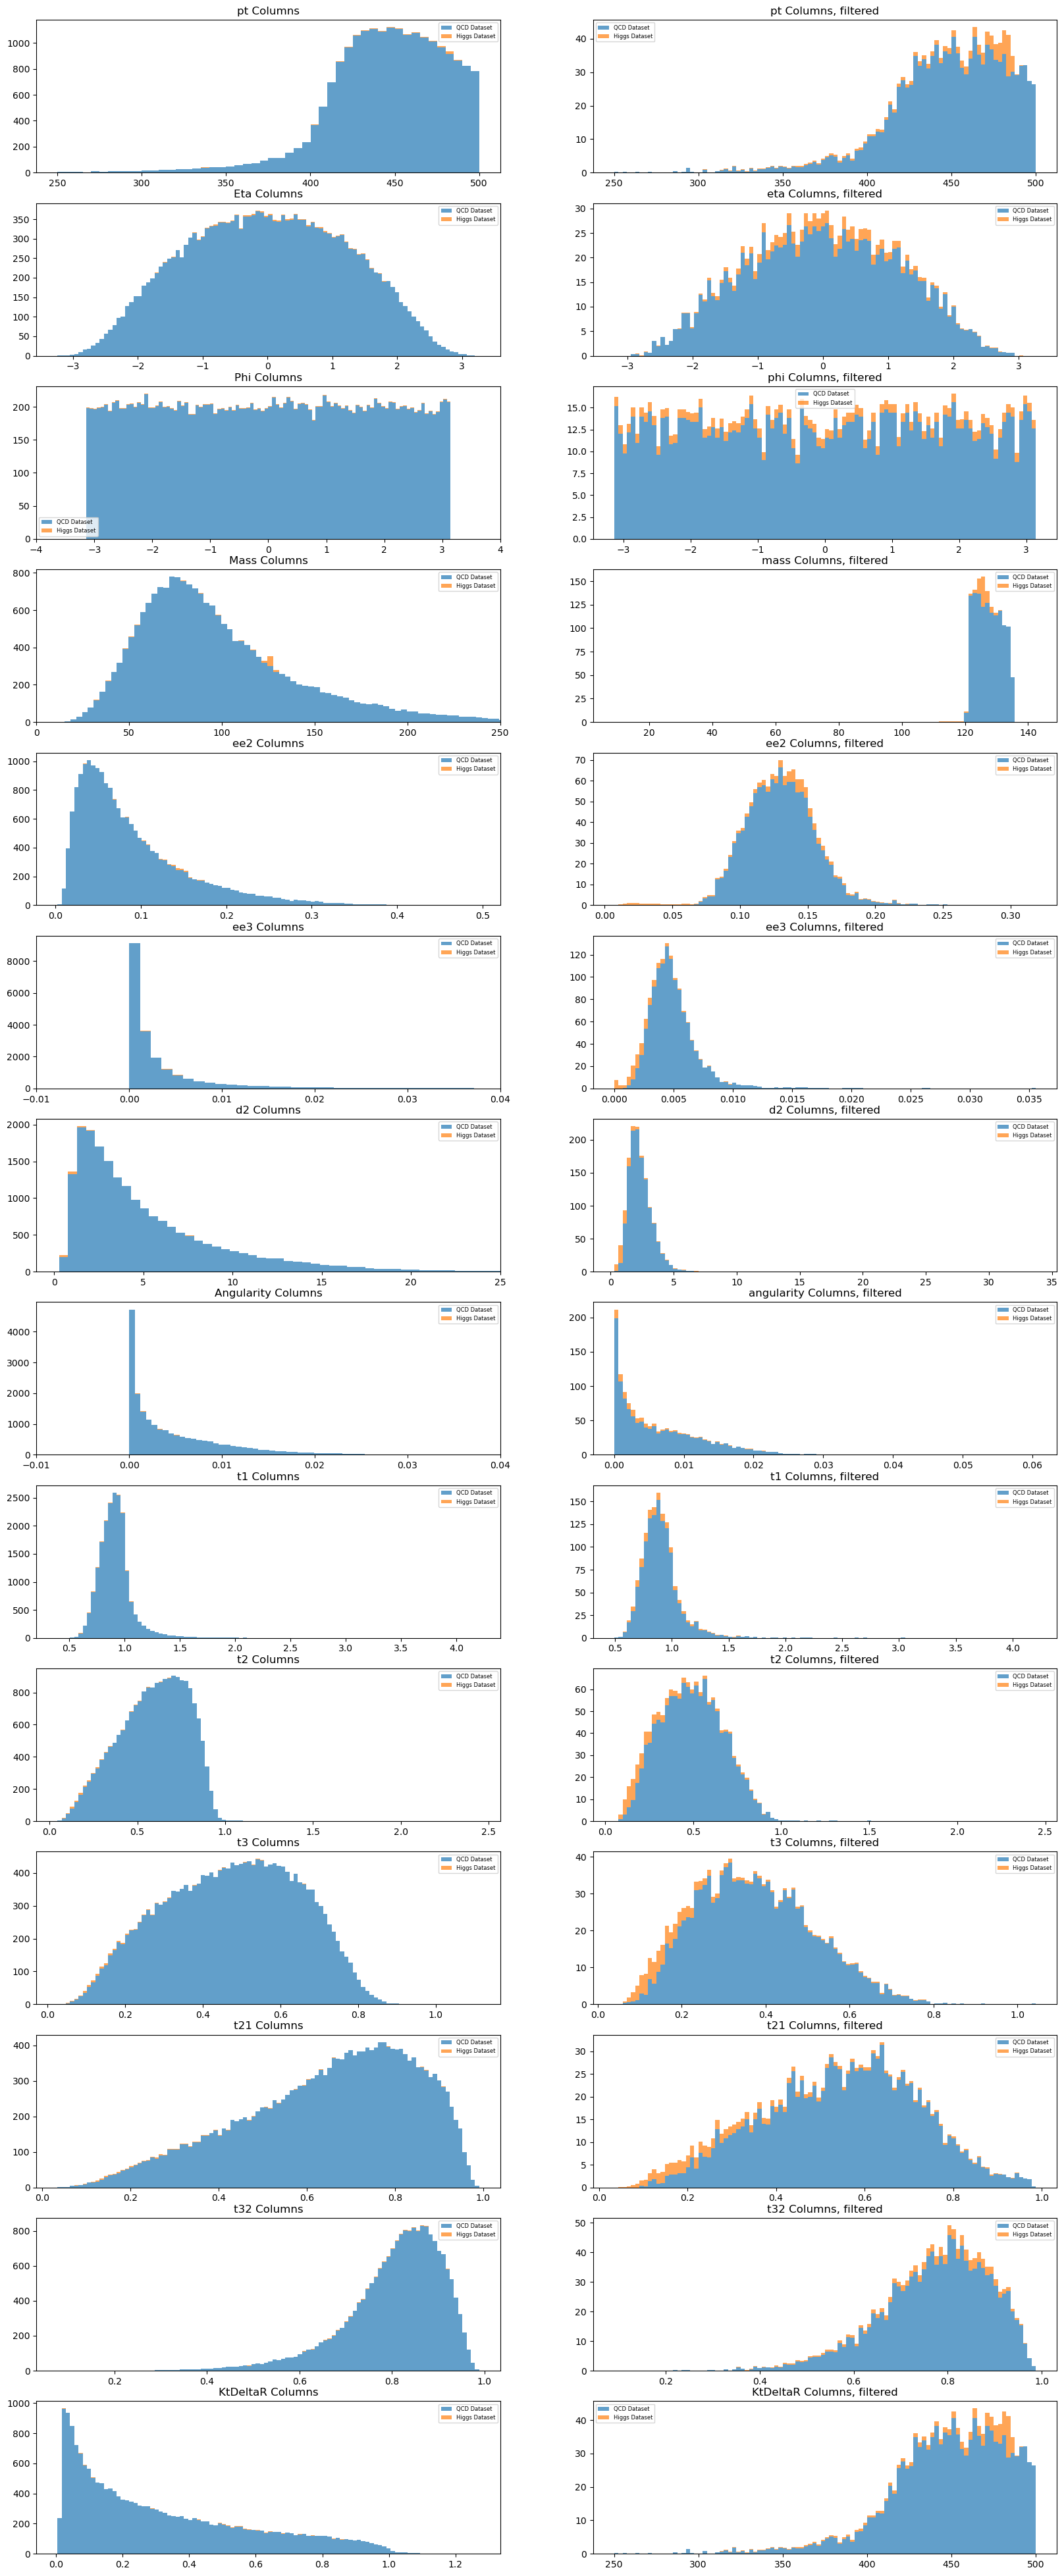

In [238]:

qcd_data_filter =(qcd['mass'] > 121) & (qcd['mass'] < 135)
higgs_data_filter = (higgs['mass'] > 121) & higgs['mass']< 135



s1 = 20000/100000
s2 = 100/100000
i = np.zeros(100000)
ii = np.zeros(100000)
i[:] = s1
ii[:] = s2

fig, ax = plt.subplots(nrows =14, ncols = 2, figsize = (20,50))


ax[0,0].hist((qcd['pt'],higgs['pt']), weights = (i,ii), bins = 50, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[0,0].legend(prop = {'size': 6})
ax[0,0].set_title('pt Columns')

ax[1,0].hist((qcd['eta'],higgs['eta']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset','Higgs Dataset'), stacked = True)
ax[1,0].legend(prop = {'size': 6})
ax[1,0].set_title('Eta Columns')

ax[2,0].hist((qcd['phi'],higgs['phi']),weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[2,0].legend(prop = {'size': 6})
ax[2,0].set_xlim(-4,4)
ax[2,0].set_title('Phi Columns')

ax[3,0].hist((qcd['mass'],higgs['mass']),weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[3,0].legend(prop = {'size': 6})
ax[3,0].set_xlim(0,250)
ax[3,0].set_title('Mass Columns')

ax[4,0].hist((qcd['ee2'],higgs['ee2']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[4,0].legend(prop = {'size': 6})
ax[4,0].set_title('ee2 Columns')

ax[5,0].hist((qcd['ee3'],higgs['ee3']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[5,0].set_xlim(-0.01,0.04)
ax[5,0].legend(prop = {'size': 6})
ax[5,0].set_title('ee3 Columns')

ax[6,0].hist((qcd['d2'],higgs['d2']), weights = (i,ii), bins =200, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[6,0].legend(prop = {'size': 6})
ax[6,0].set_xlim(-1,25)
ax[6,0].set_title('d2 Columns')

ax[7,0].hist((qcd['angularity'],higgs['angularity']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[7,0].legend(prop = {'size': 6})
ax[7,0].set_xlim(-0.01,0.04)
ax[7,0].set_title('Angularity Columns')

ax[8,0].hist((qcd['t1'],higgs['t1']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[8,0].legend(prop = {'size': 6})
ax[8,0].set_title('t1 Columns')

ax[9,0].hist((qcd['t2'],higgs['t2']), weights = (i,ii), bins =100, alpha = 0.7, label =('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[9,0].legend(prop = {'size': 6})
ax[9,0].set_title('t2 Columns')

ax[10,0].hist((qcd['t3'],higgs['t3']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[10,0].legend(prop = {'size': 6})
ax[10,0].set_title('t3 Columns')

ax[11,0].hist((qcd['t21'],higgs['t21']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'),stacked = True)
ax[11,0].legend(prop = {'size': 6})
ax[11,0].set_title('t21 Columns')

ax[12,0].hist((qcd['t32'],higgs['t32']), weights = (i,ii), bins =100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[12,0].legend(prop = {'size': 6})
ax[12,0].set_title('t32 Columns')

ax[13,0].hist((qcd['KtDeltaR'],higgs['KtDeltaR']), weights = (i,ii), bins =100, alpha = 0.7, label =('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[13,0].legend(prop = {'size': 6})
ax[13,0].set_title('KtDeltaR Columns')


qpt_filt = qcd['pt'][qcd_data_filter]
hpt_filt = higgs['pt'][higgs_data_filter]

i = np.zeros(np.size(qpt_filt))
ii = np.zeros(np.size(hpt_filt))
i[:] = s1
ii[:] = s2
ax[0,1].hist((qpt_filt,hpt_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[0,1].legend(prop = {'size': 6})
ax[0,1].set_title('pt Columns, filtered')

qeta_filt = qcd['eta'][qcd_data_filter]
heta_filt = higgs['eta'][higgs_data_filter]

i = np.zeros(np.size(qeta_filt))
ii = np.zeros(np.size(heta_filt))
i[:] = s1
ii[:] = s2
ax[1,1].hist((qeta_filt,heta_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[1,1].legend(prop = {'size': 6})
ax[1,1].set_title('eta Columns, filtered')

qphi_filt = qcd['phi'][qcd_data_filter]
hphi_filt = higgs['phi'][higgs_data_filter]

i = np.zeros(np.size(qphi_filt))
ii = np.zeros(np.size(hphi_filt))
i[:] = s1
ii[:] = s2
ax[2,1].hist((qphi_filt,hphi_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[2,1].legend(prop = {'size': 6})
ax[2,1].set_title('phi Columns, filtered')

qmass_filt = qcd['mass'][qcd_data_filter]
hmass_filt = higgs['mass'][higgs_data_filter]

i = np.zeros(np.size(qmass_filt))
ii = np.zeros(np.size(hmass_filt))
i[:] = s1
ii[:] = s2
ax[3,1].hist((qmass_filt,hmass_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[3,1].legend(prop = {'size': 6})
ax[3,1].set_title('mass Columns, filtered')

qee2_filt = qcd['ee2'][qcd_data_filter]
hee2_filt = higgs['ee2'][higgs_data_filter]

i = np.zeros(np.size(qee2_filt))
ii = np.zeros(np.size(hee2_filt))
i[:] = s1
ii[:] = s2
ax[4,1].hist((qee2_filt,hee2_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[4,1].legend(prop = {'size': 6})
ax[4,1].set_title('ee2 Columns, filtered')

qee3_filt = qcd['ee3'][qcd_data_filter]
hee3_filt = higgs['ee3'][higgs_data_filter]

i = np.zeros(np.size(qee3_filt))
ii = np.zeros(np.size(hee3_filt))
i[:] = s1
ii[:] = s2
ax[5,1].hist((qee3_filt,hee3_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[5,1].legend(prop = {'size': 6})
ax[5,1].set_title('ee3 Columns, filtered')

qd2_filt = qcd['d2'][qcd_data_filter]
hd2_filt = higgs['d2'][higgs_data_filter]

i = np.zeros(np.size(qd2_filt))
ii = np.zeros(np.size(hd2_filt))
i[:] = s1
ii[:] = s2
ax[6,1].hist((qd2_filt,hd2_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[6,1].legend(prop = {'size': 6})
ax[6,1].set_title('d2 Columns, filtered')

qangularity_filt = qcd['angularity'][qcd_data_filter]
hangularity_filt = higgs['angularity'][higgs_data_filter]

i = np.zeros(np.size(qangularity_filt))
ii = np.zeros(np.size(hangularity_filt))
i[:] = s1
ii[:] = s2
ax[7,1].hist((qangularity_filt,hangularity_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[7,1].legend(prop = {'size': 6})
ax[7,1].set_title('angularity Columns, filtered')

qt1_filt = qcd['t1'][qcd_data_filter]
ht1_filt = higgs['t1'][higgs_data_filter]

i = np.zeros(np.size(qt1_filt))
ii = np.zeros(np.size(ht1_filt))
i[:] = s1
ii[:] = s2
ax[8,1].hist((qt1_filt,ht1_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[8,1].legend(prop = {'size': 6})
ax[8,1].set_title('t1 Columns, filtered')

qt2_filt = qcd['t2'][qcd_data_filter]
ht2_filt = higgs['t2'][higgs_data_filter]

i = np.zeros(np.size(qt2_filt))
ii = np.zeros(np.size(ht2_filt))
i[:] = s1
ii[:] = s2
ax[9,1].hist((qt2_filt,ht2_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[9,1].legend(prop = {'size': 6})
ax[9,1].set_title('t2 Columns, filtered')

qt3_filt = qcd['t3'][qcd_data_filter]
ht3_filt = higgs['t3'][higgs_data_filter]

i = np.zeros(np.size(qt3_filt))
ii = np.zeros(np.size(ht3_filt))
i[:] = s1
ii[:] = s2
ax[10,1].hist((qt3_filt,ht3_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[10,1].legend(prop = {'size': 6})
ax[10,1].set_title('t3 Columns, filtered')

qt21_filt = qcd['t21'][qcd_data_filter]
ht21_filt = higgs['t21'][higgs_data_filter]

i = np.zeros(np.size(qt21_filt))
ii = np.zeros(np.size(ht21_filt))
i[:] = s1
ii[:] = s2
ax[11,1].hist((qt21_filt,ht21_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[11,1].legend(prop = {'size': 6})
ax[11,1].set_title('t21 Columns, filtered')

qt32_filt = qcd['t32'][qcd_data_filter]
ht32_filt = higgs['t32'][higgs_data_filter]

i = np.zeros(np.size(qt32_filt))
ii = np.zeros(np.size(ht32_filt))
i[:] = s1
ii[:] = s2
ax[12,1].hist((qt32_filt,ht32_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[12,1].legend(prop = {'size': 6})
ax[12,1].set_title('t32 Columns, filtered')

qKtDeltaR_filt = qcd['KtDeltaR'][qcd_data_filter]
hKtDeltaR_filt = higgs['KtDeltaR'][higgs_data_filter]

i = np.zeros(np.size(qKtDeltaR_filt))
ii = np.zeros(np.size(hKtDeltaR_filt))
i[:] = s1
ii[:] = s2
ax[13,1].hist((qpt_filt,hpt_filt), weights = (i,ii), bins = 100, alpha = 0.7, label = ('QCD Dataset', 'Higgs Dataset'), stacked = True)
ax[13,1].legend(prop = {'size': 6})
ax[13,1].set_title('KtDeltaR Columns, filtered')



plt.show()

### It is difficult to see any data sets with a feature as prominent as mass in the non-cut data. the ee2 dataset has a slight amount of prominence in a small area, but this feature is very slight.

### Within the cut data, pt, ee2, ee3, t3, t21, and KtDeltaR all may have data that is significant.

# 4 Optimize event selections using multiple features (if necessary)

    Find a set of feature cuts which achieve high expected significance.
    Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.


In [244]:
#using pT data set
qpt_filt = qcd['pt'][qcd_data_filter]
hpt_filt = higgs['pt'][higgs_data_filter]
hpt = hpt_filt
qpt = qpt_filt

hptnum = hpt[::200]
qptnum = qpt
#Ratio of points is correct for Nhiggs and Nqcd


## loop evaluating each integer mass for highest significance
start =300
shift = start-1
lst = list(range(start,500,1))
x = 0
index = range(1, np.size(lst))
for xx in lst:
    hcut = hptnum[hptnum < xx]
    qcut = qptnum[qptnum < xx]
    hsize = np.size(hcut)
    qsize = np.size(qcut)
    sig = hsize/(qsize**(1/2))
    y = np.append(x,sig)
    x = y
a= [range(0,np.size(x)),x]
maxy = (np.max(a[1]))
input_list = x
max_value = np.argmax(input_list)
v = list(zip(lst,y))
print('(Cutting Right) location and significance is ' + str(v[max_value]))


start2 = 300
shift2 = start2-1
lst2 = list(range(start2,500,1))
x2 = 0
index = range(1, np.size(lst2))
for xx2 in lst2:
    hcut2 = hptnum[hptnum > xx2]
    qcut2 = qptnum[qptnum > xx2]
    hsize2 = np.size(hcut2)
    qsize2 = np.size(qcut2)
    sig2 = hsize2/(qsize2**(1/2))
    y2 = np.append(x2,sig2)
    x2 = y2

a2= [range(0,np.size(x2)),x2]
maxy2 = (np.max(a2[1]))
input_list2 = x2
max_value2 = np.argmax(input_list2)
v2 = list(zip(lst2,y2))
print('(Cutting Left) location and significance is ' + str(v2[max_value2]))



hhcut3 = hptnum[(hptnum > v2[max_value2][0]) & (hptnum < v[max_value][0])]
qcut3 = qptnum[(qptnum > v2[max_value2][0]) & (qptnum < v[max_value][0])]
hsize3 = np.size(hcut3)
qsize3 = np.size(qcut3)
sig3 = hsize3/(qsize3**(1/2))
print('Significance between cuts '+str(sig3))

(Cutting Right) location and significance is (488, 6.686308689499255)
(Cutting Left) location and significance is (301, 6.2056188174657505)
Significance between cuts 5.199075802001055


## Evaluating Mass and pT produce a significance greater than 5sigma. This proves the higgs particle's existence.